#**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Uploading Dataset**

In [3]:
df=pd.read_csv("fake_job_postings.csv")

#**Data cleaning**


In [4]:
# Check for duplicate valus
df.duplicated().sum()

np.int64(1935)

In [5]:
# Removing Duplicates
df=df.drop_duplicates(keep='first')

In [6]:
df.isnull().sum()

,0
title,0
company_profile,3072
description,1
requirements,2290
fraudulent,0


In [7]:
df=df.dropna()

In [8]:
df

,title,company_profile,description,requirements,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0
...,...,...,...,...,...
17871,Water Truck Driver,Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,0
17872,Product Manager,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,0
17875,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0
17876,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,0


#**Balancing the Data**

In [9]:
real=df[df['fraudulent']==0]

In [10]:
fake=df[df['fraudulent']==1]

In [11]:
print("real shape",real.shape)

real shape (11022, 5)


In [12]:
print("fake shape",fake.shape)

fake shape (237, 5)


In [13]:
real=real.sample(fake.shape[0])

In [14]:
real.shape

(237, 5)

In [15]:
#Checking the shape of the data
real.shape,fake.shape

((237, 5), (237, 5))

In [16]:
#append all two labels
data=pd.concat([real,fake],ignore_index=True)

In [17]:
data.sample(10)

,title,company_profile,description,requirements,fraudulent
66,Urgent Requirement : Sr Help Desk /Technical S...,"VAM SYSTEMS is a Business Consulting, IT Solut...",Greetings from VAM SYSTEMS…..VAM SYSTEMS is a ...,Skill Set required:4-6 years of customer techn...,0
312,Make Easy Money at Home,DMT Instant Reward. We are Hiring all The Time.,"This company called INSTANT REWARD, what we do...","Computer, Internet andTelephone",1
463,Director of Engineering: Applications,...,Director of...,What you bring to the table:BS / MS in compute...,1
152,Copywriter,Want to build a 21st century financial service...,TransferWise is the clever new way to move mon...,"We're looking for somebody to- Live, breath &a...",0
361,Senior Software Engineer QA Automation,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,"Senior Software Engineer, QA AutomationQuality...",Qualifications:• BS in Computer Science or sim...,1
123,Substance Abuse Counselor (Asheville & Weaverv...,Crossroads Treatment Centers is a nationally-a...,"Are you a professional, detailed, multi-tasker...",The most qualified candidates will possess a H...,0
215,Advisor-Inbound Technical,Delivering superior customer services for over...,IBEX GLOBAL employees will receive inbound cal..., High School diploma/GED One (1) year custom...,0
261,Principal/Senior Mechanical Engineer (Package ...,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Exper...,1
206,Field Operations Specialist,"Working at FBNAt FBN, we put farmers first. Fo...",Farmers Business Network (“FBN”) is an advance...,"Things we look forHonesty, integrity and a pas...",0
327,UST Testing Technician III,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Responsibilities &amp; Position Requirements:T...,1


In [18]:
#Appending all three columns to make a single column to predict Fraudulent
data['text'] = data['company_profile'] + " " + data['description'] + " " + data['requirements']

In [19]:
data.head()

,title,company_profile,description,requirements,fraudulent,text
0,3-month paid marketing and PR internship,Want to build a 21st century financial service...,"TransferWise is a VC-backed, international mon...",We're looking for someone super confident with...,0,Want to build a 21st century financial service...
1,Marketing Representative,Tidewater Finance Co. was established in 1992 ...,To apply please visit our website at #URL_06ae...,This position requires the following qualifica...,0,Tidewater Finance Co. was established in 1992 ...
2,Javascript Web Application Developer,Eagle develops products and services that help...,DRAFT AD - DO NOT APPLY! Due to continued succ...,Essential - you must have expert-level experie...,0,Eagle develops products and services that help...
3,Head of Talent at Forward Partners,"Based in Hoxton, London, Forward Partners are ...","Location: Old Street, LondonThe team at Forwar...",Desired Skills and ExperienceWe are looking fo...,0,"Based in Hoxton, London, Forward Partners are ..."
4,Driver I - Part Time,"Novitex Enterprise Solutions, formerly Pitney ...","The Driver II will be based in Charlotte, NC. ...",Qualifications:A driver's license with a clean...,0,"Novitex Enterprise Solutions, formerly Pitney ..."


#**Transforming Data**

In [20]:
import nltk
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [24]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [25]:
data['text'].apply(transform_text)

,text
0,want build 21st centuri financi servic convinc...
1,tidewat financ establish 1992 initi purpos pur...
2,eagl develop product servic help client organi...
3,base hoxton london forward partner startup cat...
4,novitex enterpris solut formerli pitney bow ma...
...,...
469,titan busi properti tbp one countri prolif dev...
470,found 1993 group short year earn excel reput p...
471,staf amp recruit done right oil amp energi ind...
472,anthoni warren market advertis consult complet...


In [26]:
data['transformed_text']=data['text'].apply(transform_text)

In [27]:
data.head(248)

,title,company_profile,description,requirements,fraudulent,text,transformed_text
0,3-month paid marketing and PR internship,Want to build a 21st century financial service...,"TransferWise is a VC-backed, international mon...",We're looking for someone super confident with...,0,Want to build a 21st century financial service...,want build 21st centuri financi servic convinc...
1,Marketing Representative,Tidewater Finance Co. was established in 1992 ...,To apply please visit our website at #URL_06ae...,This position requires the following qualifica...,0,Tidewater Finance Co. was established in 1992 ...,tidewat financ establish 1992 initi purpos pur...
2,Javascript Web Application Developer,Eagle develops products and services that help...,DRAFT AD - DO NOT APPLY! Due to continued succ...,Essential - you must have expert-level experie...,0,Eagle develops products and services that help...,eagl develop product servic help client organi...
3,Head of Talent at Forward Partners,"Based in Hoxton, London, Forward Partners are ...","Location: Old Street, LondonThe team at Forwar...",Desired Skills and ExperienceWe are looking fo...,0,"Based in Hoxton, London, Forward Partners are ...",base hoxton london forward partner startup cat...
4,Driver I - Part Time,"Novitex Enterprise Solutions, formerly Pitney ...","The Driver II will be based in Charlotte, NC. ...",Qualifications:A driver's license with a clean...,0,"Novitex Enterprise Solutions, formerly Pitney ...",novitex enterpris solut formerli pitney bow ma...
...,...,...,...,...,...,...,...
243,Director of Strategy,Bright Edge and Aptitude Staffing Solutions ha...,"Director of Strategy | San Mateo, CA Intereste...",Requirements:Previous experience at a top-tier...,1,Bright Edge and Aptitude Staffing Solutions ha...,bright edg aptitud staf solut partner effort s...
244,UST Testing Technician II,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Job site set-up.Loading and unloading of equip...,1,Jaco Oil and Refined Resources have partnered ...,jaco oil refin resourc partner effort streamli...
245,Director of Strategy,Aptitude Staffing Solutions has redesigned the...,"Director of Strategy | San Mateo, CA Intereste...",Requirements:Previous experience at a top-tier...,1,Aptitude Staffing Solutions has redesigned the...,aptitud staf solut redesign recruit wheel inno...
246,Health + Safety Professional,...,Health &amp; Safety Professional | Bakersfield...,Duties and Responsibilities:Provides safety po...,1,...,staf amp recruit done right oil amp energi ind...


#**Data Wordclouds Representation**

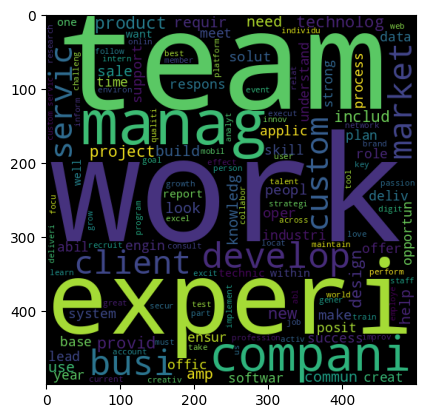

In [28]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
Real_wc=wc.generate(data[data['fraudulent']==0]['transformed_text'].str.cat(sep=""))
plt.imshow(Real_wc)

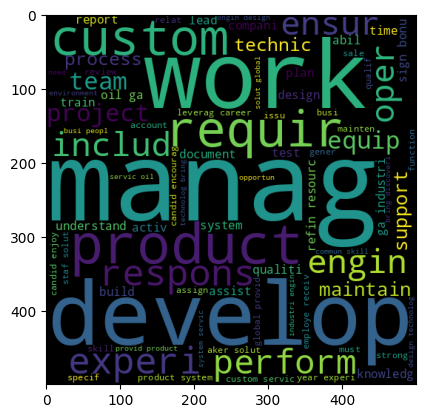

In [29]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
Fake_wc=wc.generate(data[data['fraudulent']==1]['transformed_text'].str.cat(sep=""))
plt.imshow(Fake_wc)

#**Spliting Data**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data['transformed_text'],data["fraudulent"],test_size=0.3,random_state=0,shuffle=True)

In [32]:
print(x_train)

340    industri largest suppli contract compani novat...
289    inctor consult world wide known advis give ans...
249    edison intern refin resourc partner effort str...
446    dr technolog lead supplier integr product serv...
432    aptitud staf solut redesign recruit wheel inno...
                             ...                        
323    aptitud staf solut partner effort streamlin hi...
192    cloudrunn complet autom framework fast reliabl...
117    hire avenuestori concept driven peopl team thr...
47     healthcar california oper home health agenc pr...
172    digit shadow cyber threat intellig compani pro...
Name: transformed_text, Length: 331, dtype: object


# **Building Model Pipeline Tf-idf (Random Forest)**



In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [34]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [35]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

#**Predicting the results (Random Forest)**

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
y_pred=classifier.predict(x_test)

In [38]:
# Recalculate y_pred with concatenated text
y_pred = classifier.predict(x_test)
#Accuracy Score
accuracy_score(y_test,y_pred)

0.965034965034965

In [39]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.96      0.97      0.96        66

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



#**Predicting Data with Coustom Text**

In [40]:
#fakee..........................,Marketing Intern,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours
#real............................Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween.  You'll save thousands on daily expenditures Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the Refined Resources teamPlease submit referrals via online Referral FormThank you and we look forward to working with you soon!  [ Click to enlarge Image ]","IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies safety hazards and recommends solutions.Follows environmental compliance work practices.Identifies environmental non-compliance problems and assist in implementing solutions.Assists other team members and works with all departments to support generating station in achieving their performance goals.Trains other team members in the areas of instrumentation, control, and electrical systems.Performs housekeeping assignments, as directed.Conduct equipment and system tagging according to company and plant rules and regulations.Perform equipment safety inspections, as required, and record results as appropriate. Participate in small construction projects.  Read and interpret drawings, sketches, prints, and specifications, as required.Orders parts as needed to affect maintenance and repair.Performs Operations tasks on an as-needed basis and other tasks as assigned.Available within a reasonable response time for emergency call-ins and overtime, plus provide acceptable off-hour contact by phone and company pager.          Excellent Verbal and Written Communications Skills:Ability to coordinate work activities with other team members on technical subjects across job families.Ability to work weekends, holidays, and rotating shifts, as required.","QualificationsKnowledge, Skills &amp; Abilities: A high school diploma or GED is required. Must have a valid driver’s license. Ability to read, write, and communicate effectively in English.  Good math skills. Four years of experience as an I&amp;C Technician and/or Electrician in a power plant environment, preferably with a strong electrical background, up to and including, voltages to 15 KV to provide the following:Demonstrated knowledge of electrical equipment, electronics, schematics, basics of chemistry and physics and controls and instrumentation.Demonstrated knowledge of safe work practices associated with a power plant environment.Demonstrated ability to calibrate I&amp;C systems and equipment, including analytic equipment.Demonstrated ability to configure and operate various test instruments and equipment, as necessary, to troubleshoot and repair plant equipment including, but not limited to, distributed control systems, programmable logic controllers, motor control centers, transformers, generators, and continuous emissions monitor (CEM) systems.Demonstrated ability to work with others in a team environment.


In [41]:
def predict_fraudulence(text):
    transformed_text = transform_text(text)
    prediction = classifier.predict([transformed_text])
    return prediction[0]

In [42]:
custom_text_input = """
Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween.  You'll save thousands on daily expenditures Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the Refined Resources teamPlease submit referrals via online Referral FormThank you and we look forward to working with you soon!  [ Click to enlarge Image ]","IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies safety hazards and recommends solutions.Follows environmental compliance work practices.Identifies environmental non-compliance problems and assist in implementing solutions.Assists other team members and works with all departments to support generating station in achieving their performance goals.Trains other team members in the areas of instrumentation, control, and electrical systems.Performs housekeeping assignments, as directed.Conduct equipment and system tagging according to company and plant rules and regulations.Perform equipment safety inspections, as required, and record results as appropriate. Participate in small construction projects.  Read and interpret drawings, sketches, prints, and specifications, as required.Orders parts as needed to affect maintenance and repair.Performs Operations tasks on an as-needed basis and other tasks as assigned.Available within a reasonable response time for emergency call-ins and overtime, plus provide acceptable off-hour contact by phone and company pager.          Excellent Verbal and Written Communications Skills:Ability to coordinate work activities with other team members on technical subjects across job families.Ability to work weekends, holidays, and rotating shifts, as required.","QualificationsKnowledge, Skills &amp; Abilities: A high school diploma or GED is required. Must have a valid driver’s license. Ability to read, write, and communicate effectively in English.  Good math skills. Four years of experience as an I&amp;C Technician and/or Electrician in a power plant environment, preferably with a strong electrical background, up to and including, voltages to 15 KV to provide the following:Demonstrated knowledge of electrical equipment, electronics, schematics, basics of chemistry and physics and controls and instrumentation.Demonstrated knowledge of safe work practices associated with a power plant environment.Demonstrated ability to calibrate I&amp;C systems and equipment, including analytic equipment.Demonstrated ability to configure and operate various test instruments and equipment, as necessary, to troubleshoot and repair plant equipment including, but not limited to, distributed control systems, programmable logic controllers, motor control centers, transformers, generators, and continuous emissions monitor (CEM) systems.Demonstrated ability to work with others in a team environment.
"""

In [43]:
text_to_predict = custom_text_input
if text_to_predict.strip() == "":
    print("Please provide text in the custom_text_input variable or uncomment and use sample_job_posting.")
else:
    prediction_result = predict_fraudulence(text_to_predict)

    print(f"The prediction for the provided text is: {prediction_result}")
    if prediction_result == 1:
        print("This job posting is predicted as REAL.")
    else:
        print("This job posting is predicted as FAKE.")

The prediction for the provided text is: 1
This job posting is predicted as REAL.


Conclusion- By Applying Tf-idf Random Forest ,it gives the accuracy 92%. Considered as good accuracy model

1.   But we can't say it will predict the exact real and fake job as the data we have used is limited and it will predict the result on the basis of the given data which is not applicable for the real life scenario


